# Gesture Recognition
In this group project, you are going to build a 3D Conv model that will be able to predict the 5 gestures correctly. Please import the following libraries to get started.

In [1]:
import numpy as np
import os
#from scipy.misc import imread, imresize ## Higher version of scipi i have so deprecated so we will use PIL and cv2 
from matplotlib import pyplot as plt
from PIL import Image
import cv2
import datetime
import os
import pandas as pd
import math

### Just have a hands-on on the Image Manipulation

#### With PIllow Library 

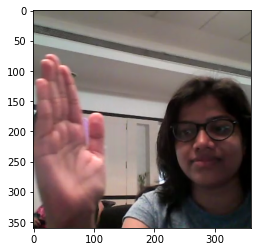

In [2]:
original_img = Image.open('Sample.png')
plt.imshow(original_img)

#### Rezise

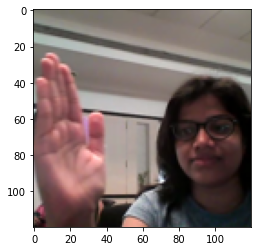

In [3]:
new_width = 120
new_height = 120

resize_img = original_img.resize((new_width, new_height))
plt.imshow(resize_img)

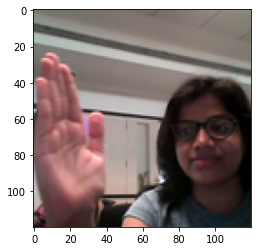

In [4]:
img1 = original_img.resize((new_width, new_height),Image.ANTIALIAS)
plt.imshow(img1)

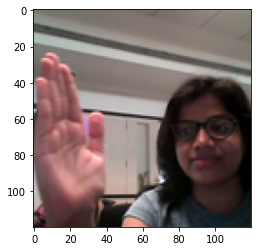

In [5]:
plt.imshow(img1, cmap = 'gray')

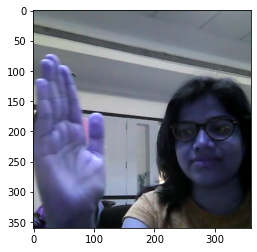

In [6]:
cv_original_image = cv2.imread('Sample.png')
plt.imshow(cv_original_image)

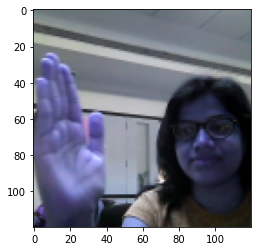

In [7]:
cv_resized_image = cv2.resize(cv_original_image,(new_width, new_height),interpolation=cv2.INTER_AREA)
plt.imshow(cv_resized_image)

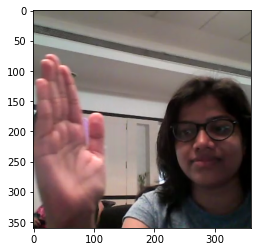

In [8]:
plt.imshow(original_img)

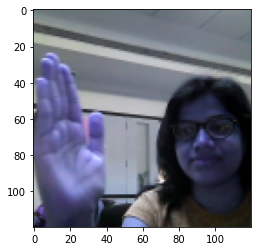

In [9]:
plt.imshow(cv_resized_image)

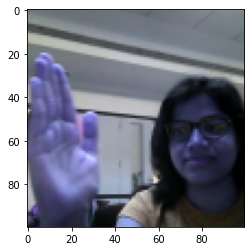

In [10]:
cv_resized_image = cv2.resize(cv_original_image, (100,100), interpolation = cv2.INTER_AREA)
plt.imshow(cv_resized_image)

We set the random seed so that the results don't vary drastically.

In [11]:
np.random.seed(30)
import random as rn
rn.seed(30)
from keras import backend as K
import tensorflow as tf
tf.random.set_seed(30)

2023-05-11 15:03:13.838717: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In this block, you read the folder names for training and validation. You also set the `batch_size` here. Note that you set the batch size in such a way that you are able to use the GPU in full capacity. You keep increasing the batch size until the machine throws an error.

In [12]:
train_path = '/Users/monu/Masters/Gesture_Recognition/Project_Data/train'
val_path ='/Users/monu/Masters/Gesture_Recognition/Project_Data/val'
train_doc = np.random.permutation(open('/Users/monu/Masters/Gesture_Recognition/Project_Data/train.csv').readlines())
val_doc = np.random.permutation(open('/Users/monu/Masters/Gesture_Recognition/Project_Data//val.csv').readlines())
batch_size = 10 #experiment with the batch size


In [13]:
train_doc_df = pd.read_csv('/Users/monu/Masters/Gesture_Recognition/Project_Data/train.csv',sep=';')
val_doc_df = pd.read_csv('/Users/monu/Masters/Gesture_Recognition/Project_Data/val.csv',sep=';')

In [14]:
display(train_doc_df.head())
train_doc_df.shape

WIN_20180925_17_08_43_Pro_Left_Swipe_new  Left_Swipe_new  0
0  WIN_20180925_17_18_28_Pro_Left_Swipe_new  Left_Swipe_new  0
1  WIN_20180925_17_18_56_Pro_Left_Swipe_new  Left_Swipe_new  0
2  WIN_20180925_17_19_51_Pro_Left_Swipe_new  Left_Swipe_new  0
3  WIN_20180925_17_20_14_Pro_Left_Swipe_new  Left_Swipe_new  0
4  WIN_20180925_17_21_28_Pro_Left_Swipe_new  Left_Swipe_new  0

(662, 3)

In [15]:
display(val_doc_df.head())
val_doc_df.shape

WIN_20180925_17_17_04_Pro_Left_Swipe_new  Left_Swipe_new  0
0  WIN_20180925_17_43_01_Pro_Left_Swipe_new  Left_Swipe_new  0
1  WIN_20180925_18_01_40_Pro_Left_Swipe_new  Left_Swipe_new  0
2  WIN_20180925_18_03_21_Pro_Left_Swipe_new  Left_Swipe_new  0
3  WIN_20180926_16_46_22_Pro_Left_Swipe_new  Left_Swipe_new  0
4  WIN_20180926_16_47_09_Pro_Left_Swipe_new  Left_Swipe_new  0

(99, 3)

In [16]:
!pwd

/Users/monu/Masters/Gesture_Recognition


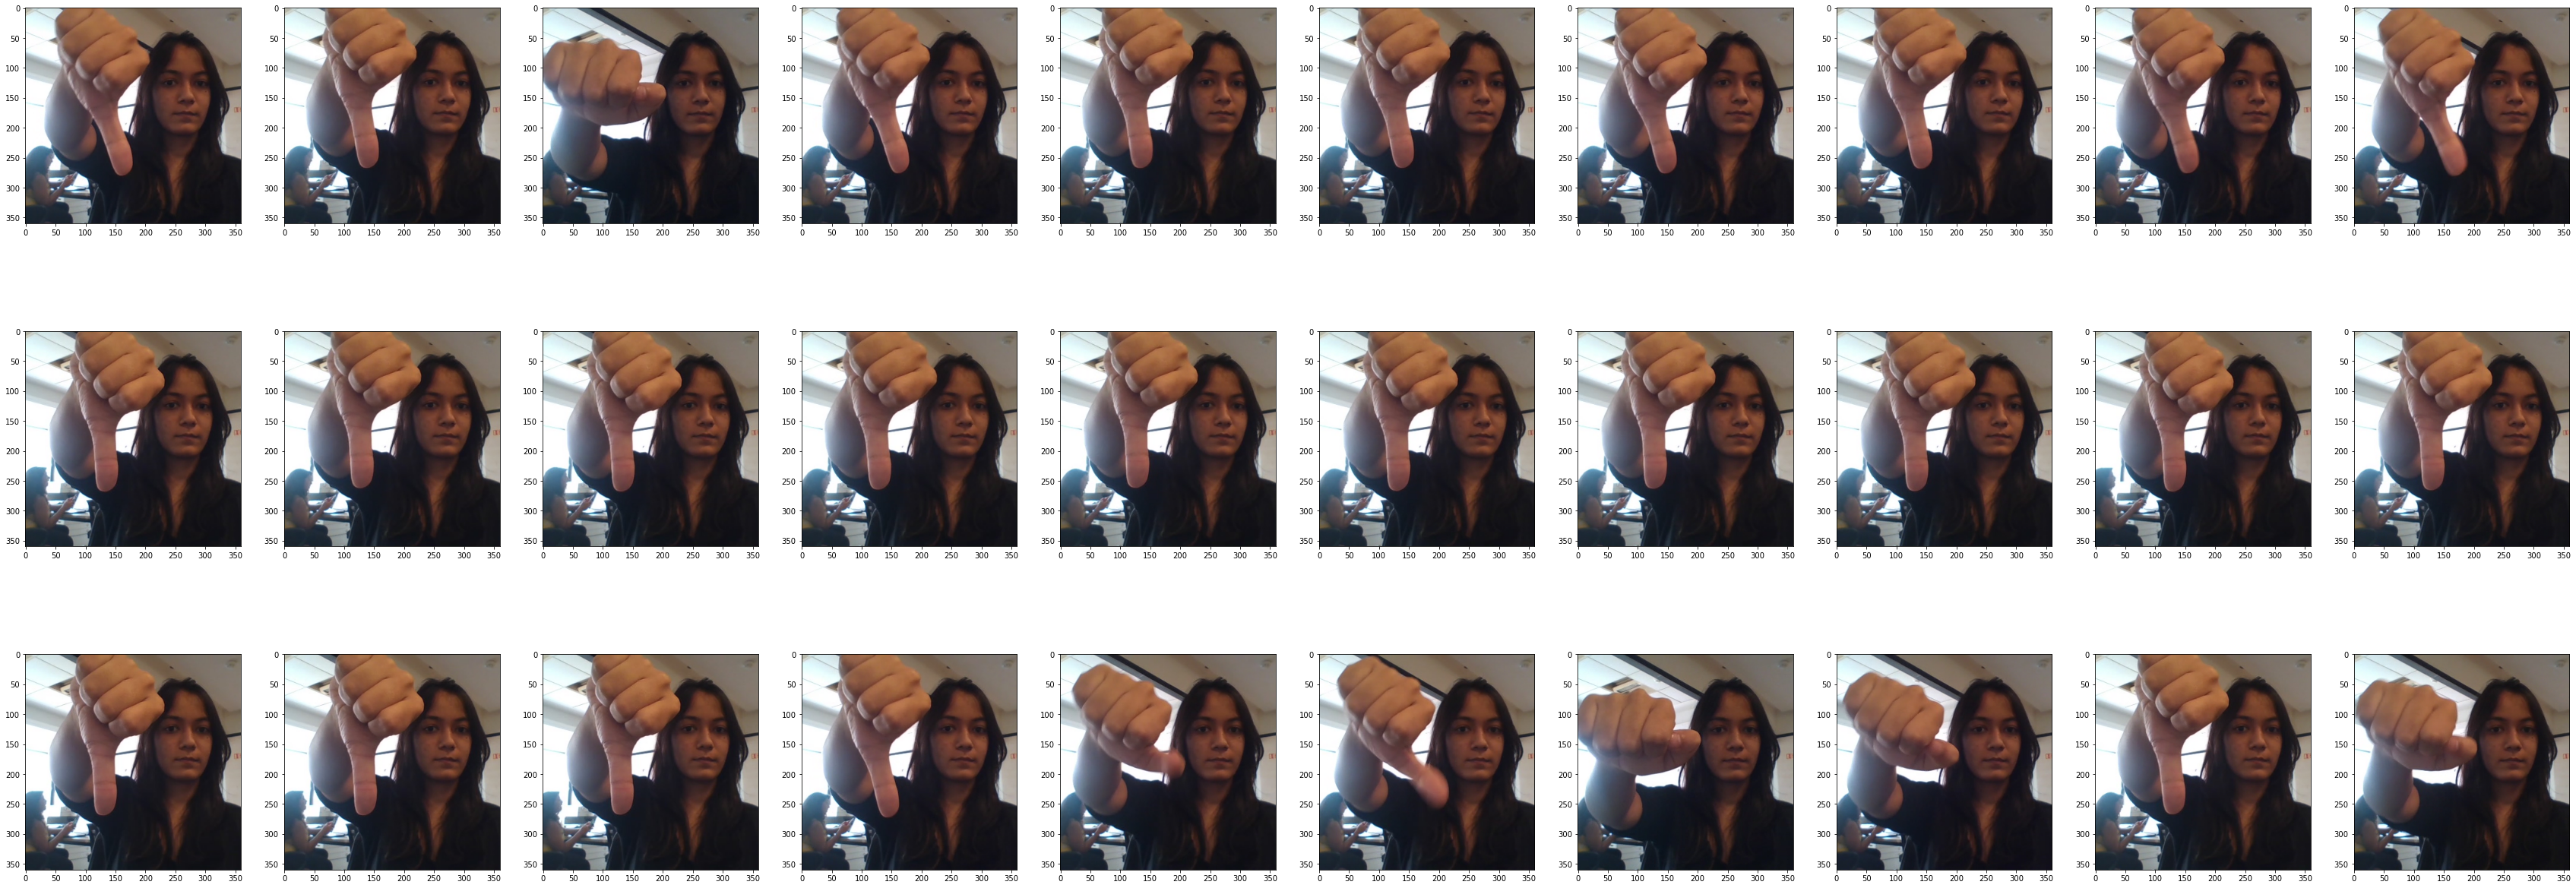

In [17]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

images = []
for img_path in glob.glob('Project_data/train/WIN_20180907_15_44_32_Pro_Thumbs Down_new/*'):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(60,30))
columns = 10
for i, image in enumerate(images):
    plt.subplot(int(len(images) / columns + 1), columns, i + 1)
    plt.imshow(image)

## Generator
This is one of the most important part of the code. The overall structure of the generator has been given. In the generator, you are going to preprocess the images as you have images of 2 different dimensions as well as create a batch of video frames. You have to experiment with `img_idx`, `y`,`z` and normalization such that you get high accuracy.

In [24]:
img_idx = [i for i in range(0,15)] #create a list of image numbers you want to use for a particular video
def generator(source_path, folder_list, batch_size):
    print( 'Source path = ', source_path, '; batch size =', batch_size)
     
    x = len(img_idx) #x is the number of images you use for each video
    y = 128 #(y,z) is the final size of the input images and 3 is the number of channels RGB
    z = 128 #(y,z) is the final size of the input images and 3 is the number of channels RGB
    while True:
        t = np.random.permutation(folder_list)
        num_batches = math.floor(len(folder_list)//batch_size) # calculate the number of batches
        for batch in range(num_batches): # we iterate over the number of batches
            batch_data = np.zeros((batch_size,x,y,z,3)) # x is the number of images you use for each video, (y,z) is the final size of the input images and 3 is the number of channels RGB
            batch_labels = np.zeros((batch_size,5)) # batch_labels is the one hot representation of the output
            for folder in range(batch_size): # iterate over the batch_size
                imgs = os.listdir(source_path+'/'+ t[folder + (batch*batch_size)].split(';')[0]) # read all the images in the folder
                for idx,item in enumerate(img_idx): #  Iterate iver the frames/images of a folder to read them in
                    image = cv2.imread(source_path+'/'+ t[folder + (batch*batch_size)].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)
                    
                    #crop the images and resize them. Note that the images are of 2 different shape 
                    #and the conv3D will throw error if the inputs in a batch have different shapes
                    # Cropping non symmetric frames
                    if image.shape[0] != image.shape[1]:
                        image=image[0:120,20:140]
                        
                    # Resizing the image
                    image = cv2.resize(image, (y, z), interpolation=cv2.INTER_AREA)
                    
                    batch_data[folder,idx,:,:,0] = image[:,:,0] - np.percentile(image[:,:,0],5) / (np.percentile(image[:,:,0],95) - np.percentile(image[:,:,0],5)) #normalise and feed in the image
                    batch_data[folder,idx,:,:,1] = image[:,:,1] - np.percentile(image[:,:,1],5) / (np.percentile(image[:,:,1],95) - np.percentile(image[:,:,0],5)) #normalise and feed in the image
                    batch_data[folder,idx,:,:,2] = image[:,:,2] - np.percentile(image[:,:,2],5) / (np.percentile(image[:,:,2],95) - np.percentile(image[:,:,0],5)) #normalise and feed in the image
                    
                batch_labels[folder, int(t[folder + (batch*batch_size)].strip().split(';')[2])] = 1
            yield batch_data, batch_labels #you yield the batch_data and the batch_labels, remember what does yield do
        
        # write the code for the remaining data points which are left after full batches
        #Code for remaining values in batch
        total_folder_processed = num_batches * batch_size # Finding total images procees
        remaining_batch_size = len(folder_list) -  total_folder_processed # finding remaining images to process
        batch_data = np.zeros((remaining_batch_size,x,y,z,3)) # x is the number of images you use for each video, (y,z) is the final size of the input images and 3 is the number of channels RGB
        batch_labels = np.zeros((remaining_batch_size,5)) # batch_labels is the one hot representation of the output
            
        for folder in range(remaining_batch_size): # iterate over remaining images
                imgs = os.listdir(source_path+'/'+ t[folder + (batch*remaining_batch_size)].split(';')[0]) # read all the images in the folder
                for idx,item in enumerate(img_idx): #  Iterate over the frames/images of a folder to read them in
                    image = cv2.imread(source_path+'/'+ t[folder + (batch*remaining_batch_size)].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)
                    
                    #crop the images and resize them. Note that the images are of 2 different shape 
                    #and the conv3D will throw error if the inputs in a batch have different shapes
                    # Cropping non symmetric frames
                    if image.shape[0] != image.shape[1]:
                        image=image[0:120,20:140]
                        
                    # Resizing the image
                    image = cv2.resize(image, (y, z), interpolation=cv2.INTER_AREA)
                    
                    batch_data[folder,idx,:,:,0] = image[:,:,0] - np.percentile(image[:,:,0],5) / (np.percentile(image[:,:,0],95) - np.percentile(image[:,:,0],5)) #normalise and feed in the image
                    batch_data[folder,idx,:,:,1] = image[:,:,1] - np.percentile(image[:,:,1],5) / (np.percentile(image[:,:,1],95) - np.percentile(image[:,:,0],5)) #normalise and feed in the image
                    batch_data[folder,idx,:,:,2] = image[:,:,2] - np.percentile(image[:,:,2],5) / (np.percentile(image[:,:,2],95) - np.percentile(image[:,:,0],5)) #normalise and feed in the image
                    
                batch_labels[folder, int(t[folder + (batch*remaining_batch_size)].strip().split(';')[2])] = 1
        yield batch_data, batch_labels #you yield the batch_data and the batch_labels, remember what does yield do

In [159]:
#img_idx = [i for i in range(0,15)] #create a list of image numbers you want to use for a particular video
def generator(source_path, folder_list, batch_size,no_of_frames=15,dim_y=128,dim_z=128,verify=False,normalize='normal'):
    print( 'Source path = ', source_path, '; batch size =', batch_size)

    #dim_y = 128 #(y,z) is the final size of the input images and 3 is the number of channels RGB
    #dim_z = 128 #(y,z) is the final size of the input images and 3 is the number of channels RGB
    img_idx = [x for x in range(0, no_of_frames)] #x is the number of images you use for each video
    while True:
        t = np.random.permutation(folder_list)
        num_batches = math.floor(len(folder_list)//batch_size) # calculate the number of batches
        for batch in range(num_batches): # we iterate over the number of batches
            batch_data = np.zeros((batch_size,no_of_frames,dim_y,dim_z,3)) # x is the number of images you use for each video, (y,z) is the final size of the input images and 3 is the number of channels RGB
            batch_labels = np.zeros((batch_size,5)) # batch_labels is the one hot representation of the output
            for folder in range(batch_size): # iterate over the batch_size
                if verify:
                    plt.figure(figsize=(no_of_frames,5))
                imgs = os.listdir(source_path+'/'+ t[folder + (batch*batch_size)].split(';')[0]) # read all the images in the folder
                for idx,item in enumerate(img_idx): #  Iterate iver the frames/images of a folder to read them in
                    image = cv2.imread(source_path+'/'+ t[folder + (batch*batch_size)].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)
                    if verify:
                        plt.subplot(2, no_of_frames, idx+1)
                        plt.imshow(image.astype('uint8'))
                    #crop the images and resize them. Note that the images are of 2 different shape 
                    #and the conv3D will throw error if the inputs in a batch have different shapes
                    # Cropping non symmetric frames
                    if image.shape[0] != image.shape[1]:
                        image=image[0:120,20:140]
                        
                    # Resizing the image
                    image = cv2.resize(image, (dim_y, dim_z), interpolation=cv2.INTER_AREA)
                    if verify:
                        plt.subplot(2, no_of_frames, idx+no_of_frames +1 )
                        plt.imshow(image.astype('uint8'))
                    batch_data[folder,idx,:,:,0] = image[:,:,0] - np.percentile(image[:,:,0],5) / (np.percentile(image[:,:,0],95) - np.percentile(image[:,:,0],5)) #normalise and feed in the image
                    batch_data[folder,idx,:,:,1] = image[:,:,1] - np.percentile(image[:,:,1],5) / (np.percentile(image[:,:,1],95) - np.percentile(image[:,:,0],5)) #normalise and feed in the image
                    batch_data[folder,idx,:,:,2] = image[:,:,2] - np.percentile(image[:,:,2],5) / (np.percentile(image[:,:,2],95) - np.percentile(image[:,:,0],5)) #normalise and feed in the image
                    
                batch_labels[folder, int(t[folder + (batch*batch_size)].strip().split(';')[2])] = 1
            yield batch_data, batch_labels #you yield the batch_data and the batch_labels, remember what does yield do
        
        # write the code for the remaining data points which are left after full batches
        #Code for remaining values in batch
        total_folder_processed = num_batches * batch_size # Finding total images procees
        remaining_batch_size = len(folder_list) -  total_folder_processed # finding remaining images to process
        batch_data = np.zeros((remaining_batch_size,no_of_frames,dim_y,dim_z,3)) # x is the number of images you use for each video, (y,z) is the final size of the input images and 3 is the number of channels RGB
        batch_labels = np.zeros((remaining_batch_size,5)) # batch_labels is the one hot representation of the output
            
        for folder in range(remaining_batch_size): # iterate over remaining images
                imgs = os.listdir(source_path+'/'+ t[folder + (batch*remaining_batch_size)].split(';')[0]) # read all the images in the folder
                for idx,item in enumerate(img_idx): #  Iterate over the frames/images of a folder to read them in
                    image = cv2.imread(source_path+'/'+ t[folder + (batch*remaining_batch_size)].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)
                    
                    #crop the images and resize them. Note that the images are of 2 different shape 
                    #and the conv3D will throw error if the inputs in a batch have different shapes
                    # Cropping non symmetric frames
                    if image.shape[0] != image.shape[1]:
                        image=image[0:120,20:140]
                        
                    # Resizing the image
                    resized_im = cv2.resize(image, (dim_y, dim_z), interpolation=cv2.INTER_AREA)
                    if verify:
                        plt.subplot(2, no_of_frames, idx+no_of_frames +1)
                        plt.imshow(image.astype('uint8'))

                    batch_data[folder,idx,:,:,0] = resized_im[:,:,0] - np.percentile(resized_im[:,:,0],5) / (np.percentile(resized_im[:,:,0],95) - np.percentile(resized_im[:,:,0],5)) #normalise and feed in the image
                    batch_data[folder,idx,:,:,1] = resized_im[:,:,1] - np.percentile(resized_im[:,:,1],5) / (np.percentile(resized_im[:,:,1],95) - np.percentile(resized_im[:,:,0],5)) #normalise and feed in the image
                    batch_data[folder,idx,:,:,2] = resized_im[:,:,2] - np.percentile(resized_im[:,:,2],5) / (np.percentile(resized_im[:,:,2],95) - np.percentile(resized_im[:,:,0],5)) #normalise and feed in the image
                   

                batch_labels[folder, int(t[folder + (batch*remaining_batch_size)].strip().split(';')[2])] = 1
        yield batch_data, batch_labels #you yield the batch_data and the batch_labels, remember what does yield do

In [133]:
curr_dt_time = datetime.datetime.now()
num_train_sequences = len(train_doc)
print('# training sequences =', num_train_sequences)
num_val_sequences = len(val_doc)
print('# validation sequences =', num_val_sequences)
num_epochs = 30 # choose the number of epochs
print ('# epochs =', num_epochs)

# training sequences = 663
# validation sequences = 100
# epochs = 30


In [134]:
data = generator(train_path, train_doc, batch_size,verify=True)

Source path =  /Users/monu/Masters/Gesture_Recognition/Project_Data/train ; batch size = 10


(array([[[[[ 4.28639450e+01,  6.48417740e+01,  8.18569412e+01],
           [ 5.21972771e+01,  7.32417755e+01,  9.02569427e+01],
           [ 6.15306129e+01,  8.42417755e+01,  9.86569366e+01],
           ...,
           [ 1.95997284e+02,  2.28575104e+02,  2.27723618e+02],
           [ 1.96997284e+02,  2.26908432e+02,  2.26923615e+02],
           [ 1.98863953e+02,  2.27841766e+02,  2.27856949e+02]],
 
          [[ 4.19306107e+01,  6.39084396e+01,  8.09236069e+01],
           [ 5.03928299e+01,  7.23084335e+01,  8.93236084e+01],
           [ 6.20906105e+01,  8.49262161e+01,  9.93413925e+01],
           ...,
           [ 1.84921753e+02,  2.16566208e+02,  2.15714737e+02],
           [ 1.86606186e+02,  2.15646210e+02,  2.15661392e+02],
           [ 1.86730621e+02,  2.15708435e+02,  2.15723618e+02]],
 
          [[ 4.61972771e+01,  6.55751114e+01,  8.25902786e+01],
           [ 5.37883911e+01,  7.31662216e+01,  9.01813812e+01],
           [ 6.40950546e+01,  8.43395538e+01,  9.95058289e+01],
  

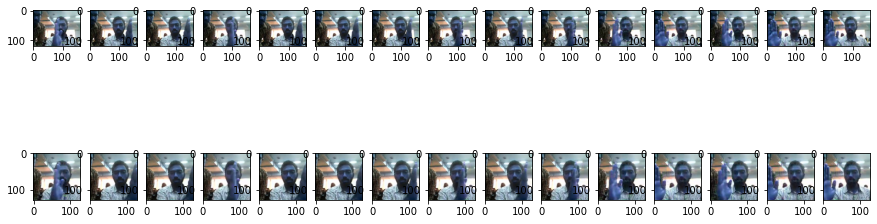

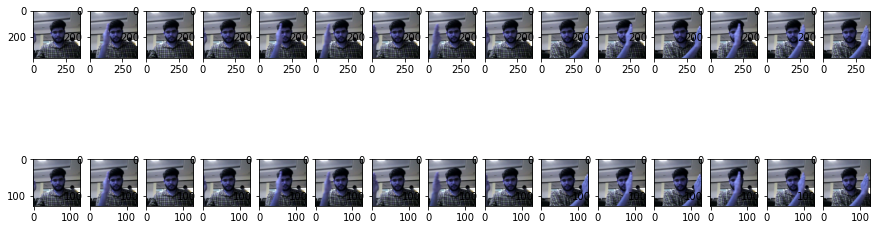

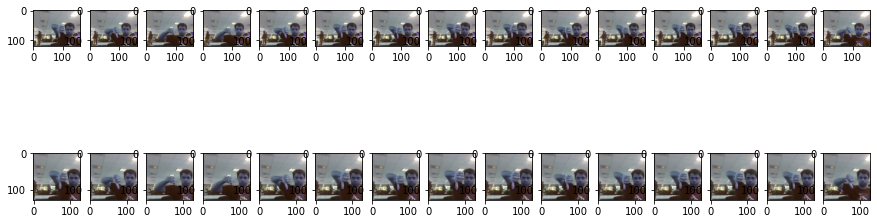

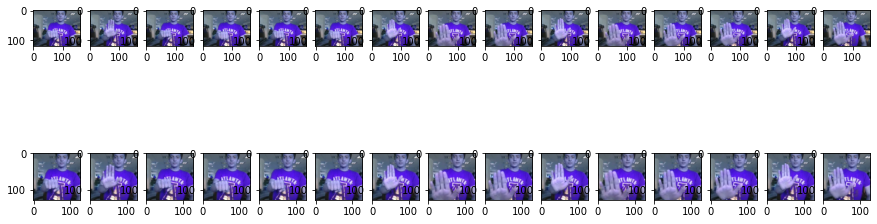

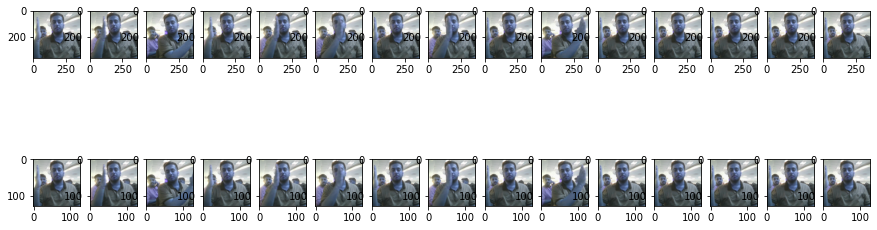

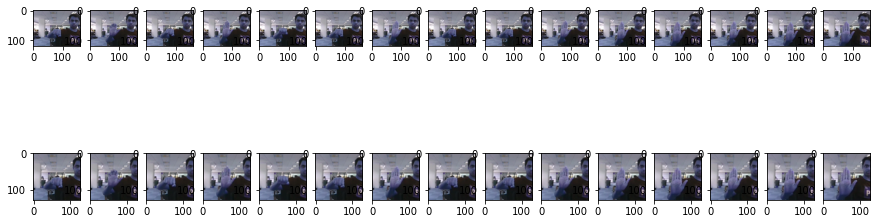

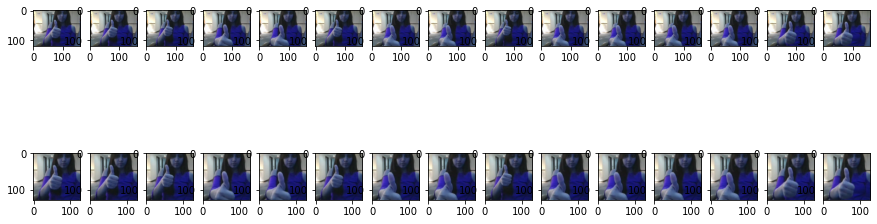

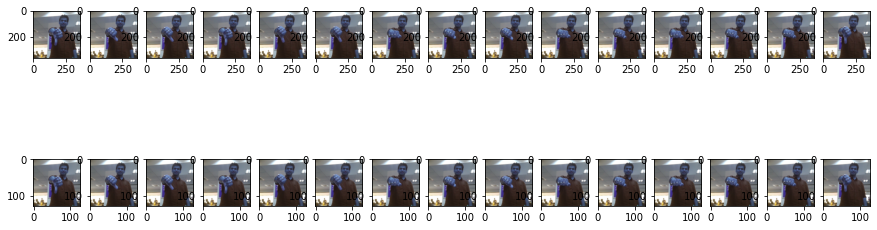

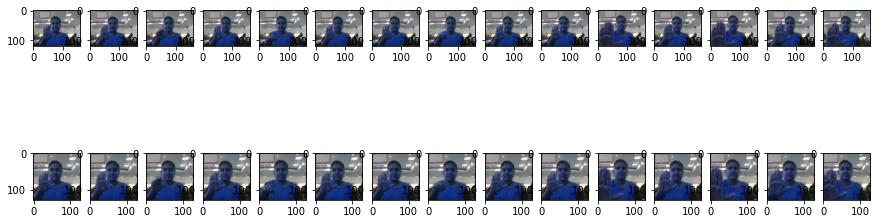

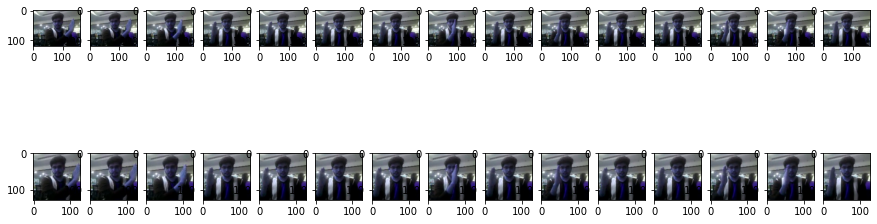

In [135]:
next(data)

In [160]:
data = generator(train_path, train_doc, batch_size,verify=True,no_of_frames=20)

Source path =  /Users/monu/Masters/Gesture_Recognition/Project_Data/train ; batch size = 10


(array([[[[[ 1.13875572e+02,  9.08715439e+01,  7.68916931e+01],
           [ 1.15742241e+02,  9.36715469e+01,  7.87583618e+01],
           [ 1.15008904e+02,  9.30048752e+01,  7.62916946e+01],
           ...,
           [ 1.37742249e+02,  1.34738205e+02,  1.30758362e+02],
           [ 1.36875580e+02,  1.33871536e+02,  1.29891693e+02],
           [ 1.36875580e+02,  1.33871536e+02,  1.29891693e+02]],
 
          [[ 1.28808914e+02,  1.06738213e+02,  9.18250275e+01],
           [ 1.28062241e+02,  1.06053764e+02,  9.10783539e+01],
           [ 1.26333344e+02,  1.04329315e+02,  8.76161423e+01],
           ...,
           [ 1.38675583e+02,  1.35671539e+02,  1.31691696e+02],
           [ 1.37746689e+02,  1.34742645e+02,  1.30762802e+02],
           [ 1.36875580e+02,  1.33871536e+02,  1.29891693e+02]],
 
          [[ 1.48075577e+02,  1.26938210e+02,  1.10225029e+02],
           [ 1.48760025e+02,  1.27622658e+02,  1.10909470e+02],
           [ 1.50831131e+02,  1.28942657e+02,  1.11998360e+02],
  

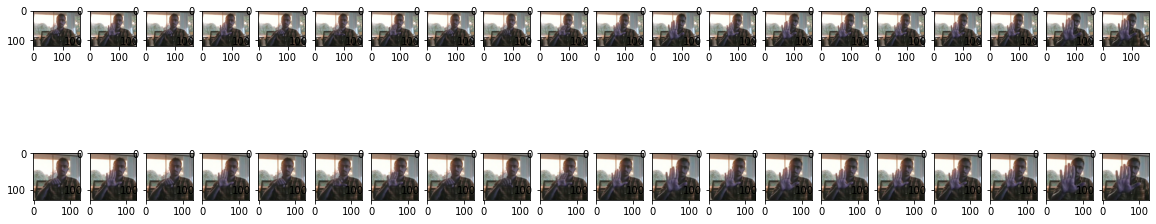

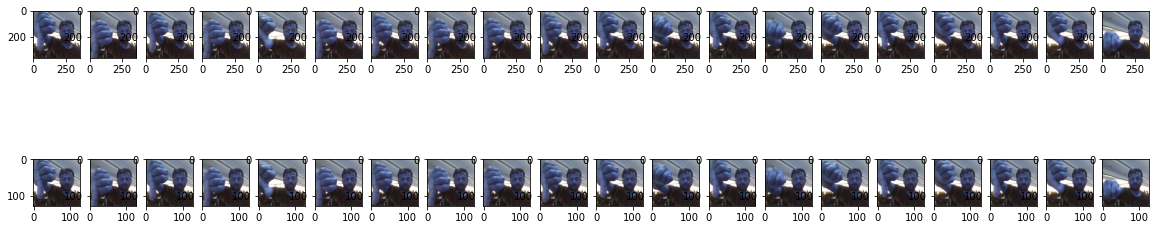

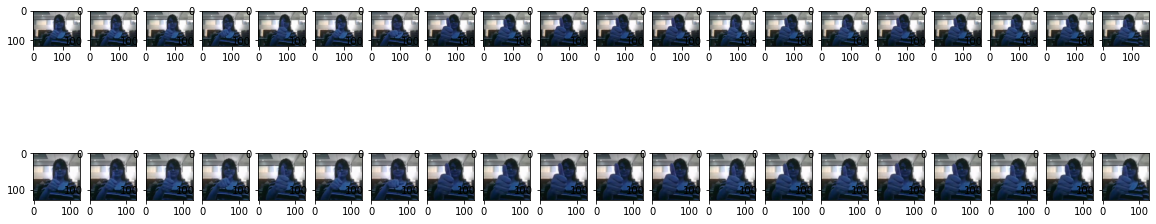

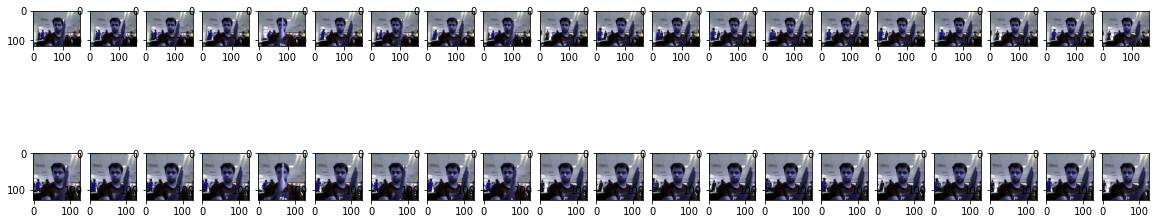

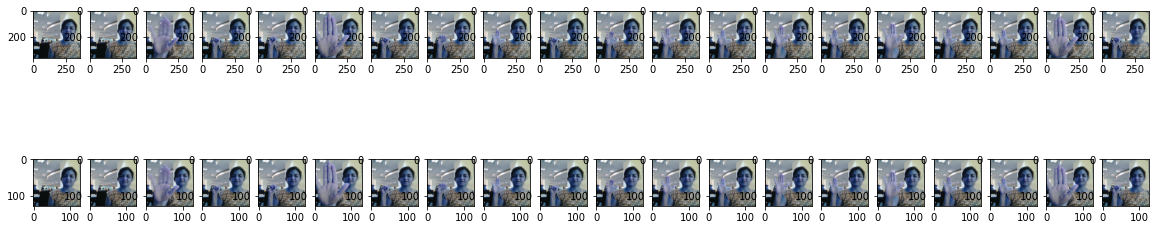

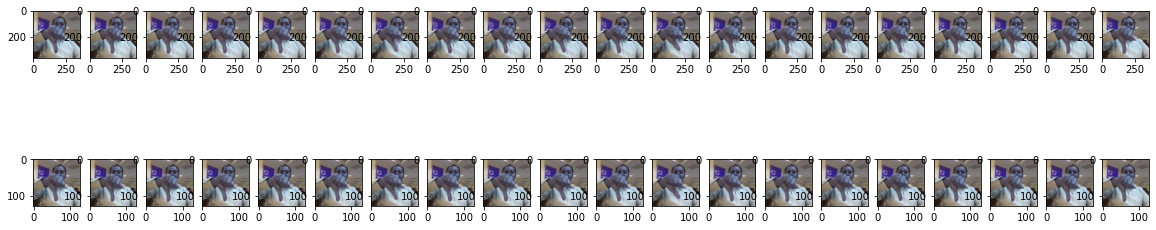

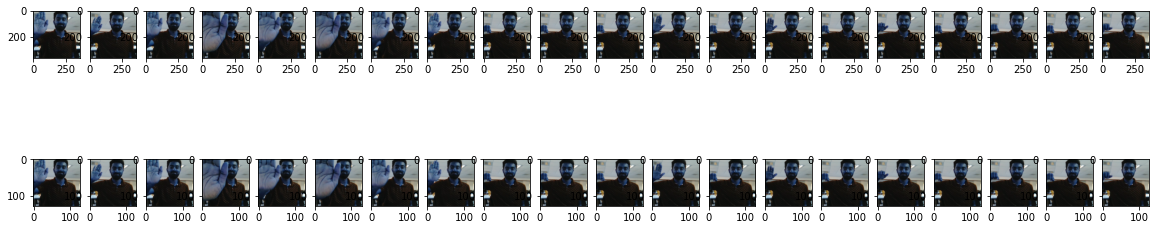

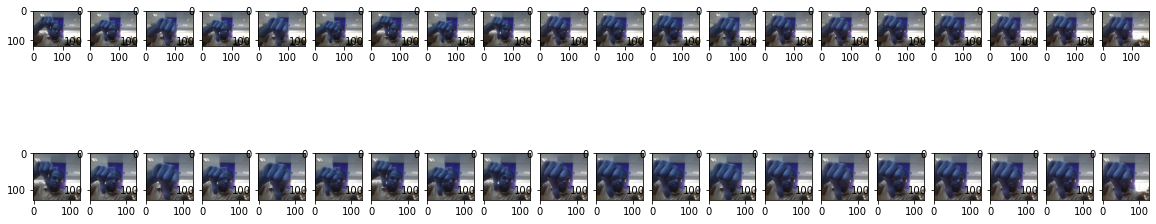

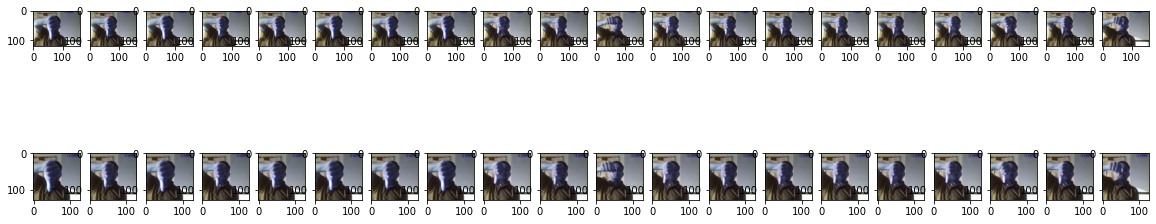

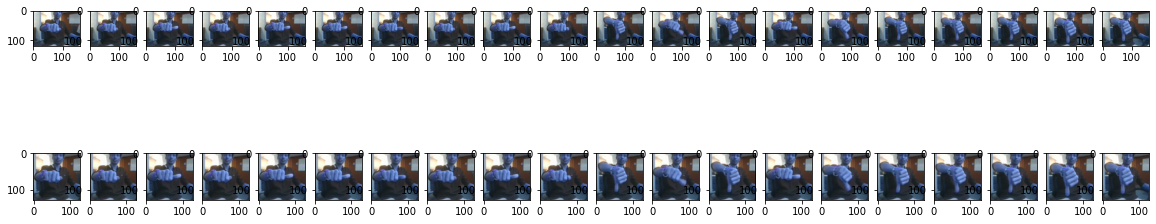

In [161]:
next(data)

Note here that a video is represented above in the generator as (number of images, height, width, number of channels). Take this into consideration while creating the model architecture.

## Model
Here you make the model using different functionalities that Keras provides. Remember to use `Conv3D` and `MaxPooling3D` and not `Conv2D` and `Maxpooling2D` for a 3D convolution model. You would want to use `TimeDistributed` while building a Conv2D + RNN model. Also remember that the last layer is the softmax. Design the network in such a way that the model is able to give good accuracy on the least number of parameters so that it can fit in the memory of the webcam.

In [162]:
from keras.models import Sequential, Model
from keras.layers import Dense, GRU, Flatten, TimeDistributed, Flatten, BatchNormalization, Activation,Dropout
from keras.layers.convolutional import Conv3D, MaxPooling3D
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras import optimizers
from keras.optimizers import Adam
#write your model here

input_shape = (10,128,128,3)
no_classes =5 
model = Sequential()

model.add(Conv3D(8, kernel_size=(3,3,3), input_shape=input_shape, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(MaxPooling3D(pool_size=(2,2,2)))

model.add(Conv3D(16, kernel_size=(3,3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(MaxPooling3D(pool_size=(2,2,2)))

model.add(Conv3D(32, kernel_size=(1,3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(MaxPooling3D(pool_size=(2,2,2)))

model.add(Conv3D(64, kernel_size=(1,3,3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(MaxPooling3D(pool_size=(1,2,2)))

#Flatten Layers
model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

#softmax layer
model.add(Dense(no_classes, activation='softmax'))


Now that you have written the model, the next step is to `compile` the model. When you print the `summary` of the model, you'll see the total number of parameters you have to train.

In [163]:
optimiser = Adam()
model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_17 (Conv3D)          (None, 10, 128, 128, 8)   656       
                                                                 
 batch_normalization_13 (Bat  (None, 10, 128, 128, 8)  32        
 chNormalization)                                                
                                                                 
 activation_17 (Activation)  (None, 10, 128, 128, 8)   0         
                                                                 
 dropout_24 (Dropout)        (None, 10, 128, 128, 8)   0         
                                                                 
 max_pooling3d_16 (MaxPoolin  (None, 5, 64, 64, 8)     0         
 g3D)                                                            
                                                                 
 conv3d_18 (Conv3D)          (None, 5, 64, 64, 16)    

Let us create the `train_generator` and the `val_generator` which will be used in `.fit_generator`.

In [164]:
train_generator = generator(train_path, train_doc, batch_size=15)
val_generator = generator(val_path, val_doc, batch_size=15)

The `steps_per_epoch` and `validation_steps` are used by `fit_generator` to decide the number of next() calls it need to make.

In [165]:
if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1

In [176]:
model_name = 'model_init' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_accuracy:.5f}.h5'
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{loss:.5f}.h5'
print(filepath)
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', save_freq=1)

LR = ReduceLROnPlateau(monitor='val_loss', factor=0.01, patience=5, cooldown=4, verbose=1,mode='auto',min_delta=0.0001)# write the REducelronplateau code here
callbacks_list = [checkpoint, LR]

model_init_2023-05-1115_46_43.666583/model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{loss:.5f}.h5


Let us now fit the model. This will start training the model and with the help of the checkpoints, you'll be able to save the model at the end of each epoch.

In [ ]:
num_epochs = 10
history = model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

/var/folders/nx/fgfzxpbx7mnbdd9mgv9jsd9w0000gn/T/ipykernel_35349/3515265544.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1,


Epoch 1/10


2023-05-11 16:33:28.701124: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]



Epoch 1: saving model to model_init_2023-05-1115_46_43.666583/model-00001-0.90830-0.73333-0.90830.h5
 1/67 [..............................] - ETA: 4:35 - loss: 0.9083 - categorical_accuracy: 0.7333
Epoch 1: saving model to model_init_2023-05-1115_46_43.666583/model-00001-1.07453-0.63333-1.07453.h5
 2/67 [..............................] - ETA: 4:29 - loss: 1.0745 - categorical_accuracy: 0.6333
Epoch 1: saving model to model_init_2023-05-1115_46_43.666583/model-00001-1.11664-0.60000-1.11664.h5
 3/67 [>.............................] - ETA: 4:32 - loss: 1.1166 - categorical_accuracy: 0.6000
Epoch 1: saving model to model_init_2023-05-1115_46_43.666583/model-00001-1.10238-0.58333-1.10238.h5
 4/67 [>.............................] - ETA: 4:29 - loss: 1.1024 - categorical_accuracy: 0.5833
Epoch 1: saving model to model_init_2023-05-1115_46_43.666583/model-00001-1.09765-0.58667-1.09765.h5
 5/67 [=>............................] - ETA: 4:23 - loss: 1.0977 - categorical_accuracy: 0.5867
Epoch 1: 

42/67 [=================>............] - ETA: 1:42 - loss: 1.0194 - categorical_accuracy: 0.6063
Epoch 1: saving model to model_init_2023-05-1115_46_43.666583/model-00001-1.02484-0.60310-1.02484.h5
43/67 [==================>...........] - ETA: 1:38 - loss: 1.0248 - categorical_accuracy: 0.6031
Epoch 1: saving model to model_init_2023-05-1115_46_43.666583/model-00001-1.02203-0.60758-1.02203.h5
44/67 [==================>...........] - ETA: 1:34 - loss: 1.0220 - categorical_accuracy: 0.6076
Epoch 1: saving model to model_init_2023-05-1115_46_43.666583/model-00001-1.02283-0.60633-1.02283.h5
45/67 [===================>..........] - ETA: 1:28 - loss: 1.0228 - categorical_accuracy: 0.6063
Epoch 1: saving model to model_init_2023-05-1115_46_43.666583/model-00001-1.01746-0.60767-1.01746.h5
46/67 [===================>..........] - ETA: 1:24 - loss: 1.0175 - categorical_accuracy: 0.6077
Epoch 1: saving model to model_init_2023-05-1115_46_43.666583/model-00001-1.01544-0.60750-1.01544.h5
47/67 [===

2023-05-11 16:38:00.573374: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


67/67 [==============================] - 283s 4s/step - loss: 0.9655 - categorical_accuracy: 0.6375 - val_loss: 1.3349 - val_categorical_accuracy: 0.4214 - lr: 0.0010
Epoch 2/10

Epoch 2: saving model to model_init_2023-05-1115_46_43.666583/model-00002-0.65745-0.73333-0.65745.h5
 1/67 [..............................] - ETA: 4:31 - loss: 0.6575 - categorical_accuracy: 0.7333
Epoch 2: saving model to model_init_2023-05-1115_46_43.666583/model-00002-0.81714-0.66667-0.81714.h5
 2/67 [..............................] - ETA: 4:26 - loss: 0.8171 - categorical_accuracy: 0.6667
Epoch 2: saving model to model_init_2023-05-1115_46_43.666583/model-00002-0.81699-0.64444-0.81699.h5
 3/67 [>.............................] - ETA: 4:21 - loss: 0.8170 - categorical_accuracy: 0.6444
Epoch 2: saving model to model_init_2023-05-1115_46_43.666583/model-00002-0.87297-0.63333-0.87297.h5
 4/67 [>.............................] - ETA: 4:16 - loss: 0.8730 - categorical_accuracy: 0.6333
Epoch 2: saving model to mode

41/67 [=================>............] - ETA: 1:45 - loss: 0.8964 - categorical_accuracy: 0.6534
Epoch 2: saving model to model_init_2023-05-1115_46_43.666583/model-00002-0.89099-0.65696-0.89099.h5
42/67 [=================>............] - ETA: 1:41 - loss: 0.8910 - categorical_accuracy: 0.6570
Epoch 2: saving model to model_init_2023-05-1115_46_43.666583/model-00002-0.89427-0.65719-0.89427.h5
43/67 [==================>...........] - ETA: 1:37 - loss: 0.8943 - categorical_accuracy: 0.6572
Epoch 2: saving model to model_init_2023-05-1115_46_43.666583/model-00002-0.89165-0.65432-0.89165.h5
44/67 [==================>...........] - ETA: 1:33 - loss: 0.8916 - categorical_accuracy: 0.6543
Epoch 2: saving model to model_init_2023-05-1115_46_43.666583/model-00002-0.88760-0.65460-0.88760.h5
45/67 [===================>..........] - ETA: 1:29 - loss: 0.8876 - categorical_accuracy: 0.6546
Epoch 2: saving model to model_init_2023-05-1115_46_43.666583/model-00002-0.88120-0.65634-0.88120.h5
46/67 [===

15/67 [=====>........................] - ETA: 3:38 - loss: 0.7346 - categorical_accuracy: 0.7512
Epoch 3: saving model to model_init_2023-05-1115_46_43.666583/model-00003-0.71977-0.75439-0.71977.h5
16/67 [======>.......................] - ETA: 3:33 - loss: 0.7198 - categorical_accuracy: 0.7544
Epoch 3: saving model to model_init_2023-05-1115_46_43.666583/model-00003-0.70371-0.76132-0.70371.h5
17/67 [======>.......................] - ETA: 3:29 - loss: 0.7037 - categorical_accuracy: 0.7613
Epoch 3: saving model to model_init_2023-05-1115_46_43.666583/model-00003-0.71769-0.75194-0.71769.h5
18/67 [=======>......................] - ETA: 3:25 - loss: 0.7177 - categorical_accuracy: 0.7519
Epoch 3: saving model to model_init_2023-05-1115_46_43.666583/model-00003-0.71338-0.74725-0.71338.h5
19/67 [=======>......................] - ETA: 3:21 - loss: 0.7134 - categorical_accuracy: 0.7473
Epoch 3: saving model to model_init_2023-05-1115_46_43.666583/model-00003-0.71488-0.74306-0.71488.h5
20/67 [===

56/67 [========================>.....] - ETA: 45s - loss: 0.7793 - categorical_accuracy: 0.7034
Epoch 3: saving model to model_init_2023-05-1115_46_43.666583/model-00003-0.78094-0.70156-0.78094.h5
57/67 [========================>.....] - ETA: 41s - loss: 0.7809 - categorical_accuracy: 0.7016
Epoch 3: saving model to model_init_2023-05-1115_46_43.666583/model-00003-0.77941-0.70331-0.77941.h5
58/67 [========================>.....] - ETA: 37s - loss: 0.7794 - categorical_accuracy: 0.7033
Epoch 3: saving model to model_init_2023-05-1115_46_43.666583/model-00003-0.77978-0.70267-0.77978.h5
59/67 [=========================>....] - ETA: 33s - loss: 0.7798 - categorical_accuracy: 0.7027
Epoch 3: saving model to model_init_2023-05-1115_46_43.666583/model-00003-0.79030-0.69977-0.79030.h5
60/67 [=========================>....] - ETA: 28s - loss: 0.7903 - categorical_accuracy: 0.6998
Epoch 3: saving model to model_init_2023-05-1115_46_43.666583/model-00003-0.78908-0.69921-0.78908.h5
61/67 [========

30/67 [============>.................] - ETA: 2:32 - loss: 0.7617 - categorical_accuracy: 0.7055
Epoch 4: saving model to model_init_2023-05-1115_46_43.666583/model-00004-0.75888-0.70640-0.75888.h5
31/67 [============>.................] - ETA: 2:28 - loss: 0.7589 - categorical_accuracy: 0.7064
Epoch 4: saving model to model_init_2023-05-1115_46_43.666583/model-00004-0.74847-0.70940-0.74847.h5
32/67 [=============>................] - ETA: 2:24 - loss: 0.7485 - categorical_accuracy: 0.7094

In [182]:
def plot_accuracy(history):
    # summarize history for accuracy
    plt.plot(history.history['categorical_accuracy']) # Get 
    plt.plot(history.history['val_categorical_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'dev'], loc='upper left')
    plt.show()

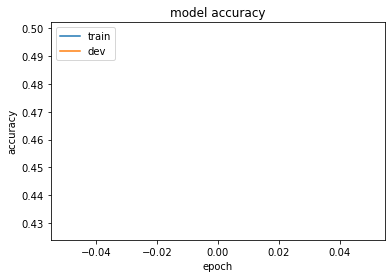

In [183]:
plot_accuracy(history)

In [184]:
plot_accuracy

<function __main__.plot_accuracy(history)>

In [185]:
history

In [186]:
history.history

{'loss': [1.1902666091918945],
 'categorical_accuracy': [0.4984894394874573],
 'val_loss': [1.3546168804168701],
 'val_categorical_accuracy': [0.4275861978530884],
 'lr': [0.001]}